# Baseline Model Training

This notebook trains a baseline sentiment classifier (DistilBERT) on hierarchically nested training sets (100, 250, 500, 1000 samples) and evaluates its performance.

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import transformers
# Suppress tokenizer parallelism warnings
os.environ["TOKENIZERS_PARALLELISM"] = "false"

import logging

# Suppress transformers initialization warnings
transformers.logging.set_verbosity_error()

# Add src to path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from data_loader import load_and_split_data
from models import SentimentClassifier

## Load Data

In [2]:
splits = load_and_split_data()
test_df = splits['test']
val_df = splits['val']

Loading dataset: takala/financial_phrasebank (sentences_allagree)


Using the latest cached version of the dataset since takala/financial_phrasebank couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'sentences_allagree' at /Users/stefanbinkert/.cache/huggingface/datasets/takala___financial_phrasebank/sentences_allagree/1.0.0/550bde12e6c30e2674da973a55f57edde5181d53f5a5a34c1531c53f93b7e141 (last modified on Tue Nov 25 21:04:35 2025).


Total samples: 2264
Test size: 453
Validation size: 182
Training pool size: 1629
Created split 'train_100': 100 samples
Created split 'unlabeled_100': 1529 samples
Created split 'train_250': 250 samples
Created split 'unlabeled_250': 1379 samples
Created split 'train_500': 500 samples
Created split 'unlabeled_500': 1129 samples
Created split 'train_1000': 1000 samples
Created split 'unlabeled_1000': 629 samples


## Train and Evaluate on Different Sizes

We will train a separate model for each training set size and record the test accuracy and F1 score.

In [3]:
train_sizes = [100, 250, 500, 1000]
results = []

for size in train_sizes:
    print(f"\n=== Training on {size} samples ===")
    train_df = splits[f'train_{size}']
    
    # Initialize model
    classifier = SentimentClassifier(model_name="distilbert-base-uncased", output_dir=f"../models/baseline_{size}")
    
    # Train
    classifier.train(train_df, val_df, epochs=3, batch_size=16)
    
    # Evaluate
    metrics = classifier.evaluate(test_df)
    print(f"Results for {size}: {metrics}")
    
    results.append({
        'train_size': size,
        'accuracy': metrics['eval_accuracy'],
        'f1': metrics['eval_f1']
    })


=== Training on 100 samples ===


Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/182 [00:00<?, ? examples/s]

{'eval_loss': 0.9558414816856384, 'eval_accuracy': 0.6153846153846154, 'eval_f1': 0.25396825396825395, 'eval_precision': 0.20512820512820515, 'eval_recall': 0.3333333333333333, 'eval_runtime': 2.015, 'eval_samples_per_second': 90.323, 'eval_steps_per_second': 5.955, 'epoch': 1.0}
{'loss': 1.0248, 'grad_norm': 1.5348460674285889, 'learning_rate': 1.1428571428571429e-05, 'epoch': 1.4285714285714286}
{'eval_loss': 0.901982307434082, 'eval_accuracy': 0.6318681318681318, 'eval_f1': 0.29740280992121937, 'eval_precision': 0.5418994413407822, 'eval_recall': 0.35507246376811596, 'eval_runtime': 1.9203, 'eval_samples_per_second': 94.776, 'eval_steps_per_second': 6.249, 'epoch': 2.0}
{'loss': 0.9331, 'grad_norm': 2.325026035308838, 'learning_rate': 1.904761904761905e-06, 'epoch': 2.857142857142857}
{'eval_loss': 0.8790551424026489, 'eval_accuracy': 0.6318681318681318, 'eval_f1': 0.29772079772079774, 'eval_precision': 0.37878787878787873, 'eval_recall': 0.35507246376811596, 'eval_runtime': 1.9026,

Map:   0%|          | 0/453 [00:00<?, ? examples/s]

/Users/stefanbinkert/Documents/FHNW_DS/NPR/NPR_MC_2/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
wandb: Currently logged in as: steff72 (steff72-fachhochschule-nordwestschweiz-fhnw) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


{'eval_loss': 0.881465494632721, 'eval_model_preparation_time': 0.0005, 'eval_accuracy': 0.6225165562913907, 'eval_f1': 0.2783745842998596, 'eval_precision': 0.35685685685685686, 'eval_recall': 0.3450292397660819, 'eval_runtime': 5.1034, 'eval_samples_per_second': 88.765, 'eval_steps_per_second': 11.169}
Results for 100: {'eval_loss': 0.881465494632721, 'eval_model_preparation_time': 0.0005, 'eval_accuracy': 0.6225165562913907, 'eval_f1': 0.2783745842998596, 'eval_precision': 0.35685685685685686, 'eval_recall': 0.3450292397660819, 'eval_runtime': 5.1034, 'eval_samples_per_second': 88.765, 'eval_steps_per_second': 11.169}

=== Training on 250 samples ===


Map:   0%|          | 0/250 [00:00<?, ? examples/s]

Map:   0%|          | 0/182 [00:00<?, ? examples/s]

{'loss': 0.995, 'grad_norm': 2.80487322807312, 'learning_rate': 1.6250000000000002e-05, 'epoch': 0.625}
{'eval_loss': 0.8491618633270264, 'eval_accuracy': 0.6153846153846154, 'eval_f1': 0.25396825396825395, 'eval_precision': 0.20512820512820515, 'eval_recall': 0.3333333333333333, 'eval_runtime': 1.9371, 'eval_samples_per_second': 93.953, 'eval_steps_per_second': 6.195, 'epoch': 1.0}
{'loss': 0.8851, 'grad_norm': 3.526329517364502, 'learning_rate': 1.2083333333333333e-05, 'epoch': 1.25}
{'loss': 0.7823, 'grad_norm': 2.0268166065216064, 'learning_rate': 7.916666666666667e-06, 'epoch': 1.875}
{'eval_loss': 0.7080453634262085, 'eval_accuracy': 0.7307692307692307, 'eval_f1': 0.4596147246221108, 'eval_precision': 0.43672968601862694, 'eval_recall': 0.48977743271221535, 'eval_runtime': 1.928, 'eval_samples_per_second': 94.399, 'eval_steps_per_second': 6.224, 'epoch': 2.0}
{'loss': 0.7135, 'grad_norm': 2.6512393951416016, 'learning_rate': 3.7500000000000005e-06, 'epoch': 2.5}
{'eval_loss': 0.6

Map:   0%|          | 0/453 [00:00<?, ? examples/s]

/Users/stefanbinkert/Documents/FHNW_DS/NPR/NPR_MC_2/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


{'eval_loss': 0.6671939492225647, 'eval_model_preparation_time': 0.0005, 'eval_accuracy': 0.7615894039735099, 'eval_f1': 0.5025210084033613, 'eval_precision': 0.46773520133605495, 'eval_recall': 0.5430392528082797, 'eval_runtime': 5.0491, 'eval_samples_per_second': 89.718, 'eval_steps_per_second': 11.289}
Results for 250: {'eval_loss': 0.6671939492225647, 'eval_model_preparation_time': 0.0005, 'eval_accuracy': 0.7615894039735099, 'eval_f1': 0.5025210084033613, 'eval_precision': 0.46773520133605495, 'eval_recall': 0.5430392528082797, 'eval_runtime': 5.0491, 'eval_samples_per_second': 89.718, 'eval_steps_per_second': 11.289}

=== Training on 500 samples ===


Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/182 [00:00<?, ? examples/s]

{'loss': 1.0056, 'grad_norm': 2.7681264877319336, 'learning_rate': 1.8125e-05, 'epoch': 0.3125}
{'loss': 0.8583, 'grad_norm': 3.0605740547180176, 'learning_rate': 1.604166666666667e-05, 'epoch': 0.625}
{'loss': 0.8079, 'grad_norm': 2.319941520690918, 'learning_rate': 1.3958333333333333e-05, 'epoch': 0.9375}
{'eval_loss': 0.6468656659126282, 'eval_accuracy': 0.7637362637362637, 'eval_f1': 0.5038026944806605, 'eval_precision': 0.46848350018539114, 'eval_recall': 0.5460662525879917, 'eval_runtime': 2.0041, 'eval_samples_per_second': 90.812, 'eval_steps_per_second': 5.988, 'epoch': 1.0}
{'loss': 0.6307, 'grad_norm': 2.0469536781311035, 'learning_rate': 1.1875e-05, 'epoch': 1.25}
{'loss': 0.5873, 'grad_norm': 2.7252581119537354, 'learning_rate': 9.791666666666666e-06, 'epoch': 1.5625}
{'loss': 0.5061, 'grad_norm': 2.660175323486328, 'learning_rate': 7.708333333333334e-06, 'epoch': 1.875}
{'eval_loss': 0.4753744900226593, 'eval_accuracy': 0.7857142857142857, 'eval_f1': 0.5193560280201548, 'e

Map:   0%|          | 0/453 [00:00<?, ? examples/s]

/Users/stefanbinkert/Documents/FHNW_DS/NPR/NPR_MC_2/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


{'eval_loss': 0.4492657780647278, 'eval_model_preparation_time': 0.0005, 'eval_accuracy': 0.7991169977924945, 'eval_f1': 0.5390807095589332, 'eval_precision': 0.49883390216154727, 'eval_recall': 0.592746855147461, 'eval_runtime': 5.3969, 'eval_samples_per_second': 83.937, 'eval_steps_per_second': 10.562}
Results for 500: {'eval_loss': 0.4492657780647278, 'eval_model_preparation_time': 0.0005, 'eval_accuracy': 0.7991169977924945, 'eval_f1': 0.5390807095589332, 'eval_precision': 0.49883390216154727, 'eval_recall': 0.592746855147461, 'eval_runtime': 5.3969, 'eval_samples_per_second': 83.937, 'eval_steps_per_second': 10.562}

=== Training on 1000 samples ===


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/182 [00:00<?, ? examples/s]

{'loss': 1.0177, 'grad_norm': 2.753699779510498, 'learning_rate': 1.904761904761905e-05, 'epoch': 0.15873015873015872}
{'loss': 0.9194, 'grad_norm': 2.3035318851470947, 'learning_rate': 1.798941798941799e-05, 'epoch': 0.31746031746031744}
{'loss': 0.7565, 'grad_norm': 2.3694705963134766, 'learning_rate': 1.693121693121693e-05, 'epoch': 0.47619047619047616}
{'loss': 0.6034, 'grad_norm': 2.8529458045959473, 'learning_rate': 1.5873015873015872e-05, 'epoch': 0.6349206349206349}
{'loss': 0.6036, 'grad_norm': 3.7405221462249756, 'learning_rate': 1.4814814814814815e-05, 'epoch': 0.7936507936507936}
{'loss': 0.5252, 'grad_norm': 3.5974435806274414, 'learning_rate': 1.3756613756613758e-05, 'epoch': 0.9523809523809523}
{'eval_loss': 0.4047951400279999, 'eval_accuracy': 0.8571428571428571, 'eval_f1': 0.7637034707480498, 'eval_precision': 0.8711304347826087, 'eval_recall': 0.7252415458937197, 'eval_runtime': 2.9763, 'eval_samples_per_second': 61.15, 'eval_steps_per_second': 4.032, 'epoch': 1.0}
{'

Map:   0%|          | 0/453 [00:00<?, ? examples/s]

/Users/stefanbinkert/Documents/FHNW_DS/NPR/NPR_MC_2/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


{'eval_loss': 0.22175608575344086, 'eval_model_preparation_time': 0.0005, 'eval_accuracy': 0.9337748344370861, 'eval_f1': 0.9122126389714359, 'eval_precision': 0.9136416861826698, 'eval_recall': 0.9108371628840155, 'eval_runtime': 5.9242, 'eval_samples_per_second': 76.465, 'eval_steps_per_second': 9.621}
Results for 1000: {'eval_loss': 0.22175608575344086, 'eval_model_preparation_time': 0.0005, 'eval_accuracy': 0.9337748344370861, 'eval_f1': 0.9122126389714359, 'eval_precision': 0.9136416861826698, 'eval_recall': 0.9108371628840155, 'eval_runtime': 5.9242, 'eval_samples_per_second': 76.465, 'eval_steps_per_second': 9.621}


## Plot Learning Curve

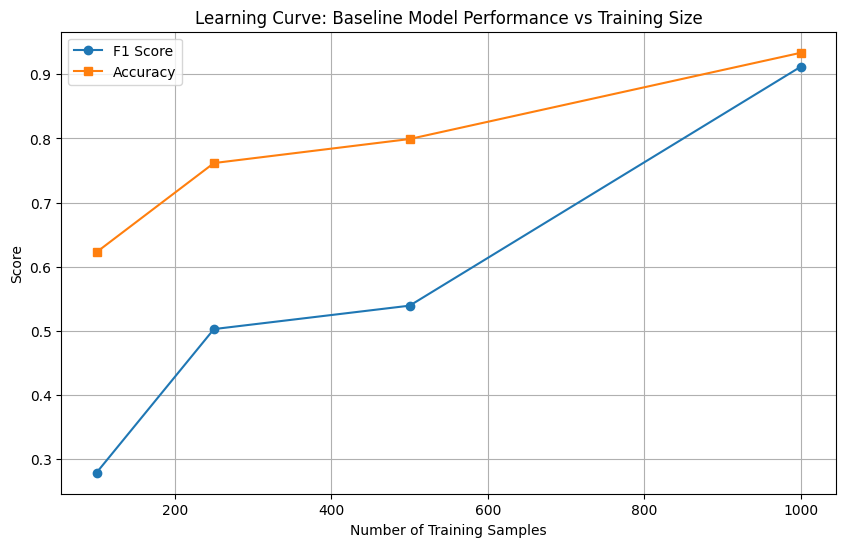

In [4]:
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.plot(results_df['train_size'], results_df['f1'], marker='o', label='F1 Score')
plt.plot(results_df['train_size'], results_df['accuracy'], marker='s', label='Accuracy')
plt.title('Learning Curve: Baseline Model Performance vs Training Size')
plt.xlabel('Number of Training Samples')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
results_df

,train_size,accuracy,f1
0,100,0.622517,0.278375
1,250,0.761589,0.502521
2,500,0.799117,0.539081
3,1000,0.933775,0.912213
